## Proposal
https://www.authorea.com/users/106600/articles/140971/_show_article

In [1]:
import pandas as pd
import os
%matplotlib inline
 
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import ast
import HTMLParser
import string
import json

import plotly.plotly as py
#py.sign_in('username', 'API') if plotly is not in local machine
import numpy as np
import sys
import time
import statsmodels.formula.api as smf
import seaborn as sns
pd.options.display.mpl_style = 'default'
from matplotlib import rcParams
import plotly.graph_objs as go


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning:

The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning:


mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.




In [2]:
def getHousePrice(datestring):
    """
    Download house price data from NYC open data and save it in PUIdata
    """
    ### First check that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + ".json"):
        if os.path.isfile(datestring + ".json"):
            # if in the current dir just move it
            if os.system("mv " + datestring + ".json " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + ".json"):
                if not os.path.isfile(datestring + ".json"):
                    os.system("curl -O https://data.cityofnewyork.us/resource/" + datestring + ".json")
                    print "Downloading", datestring
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + ".json " + os.getenv("PUIDATA"))
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + ".json"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print (datestring," in place, you can continue")

#### Data is availble for the following boroughs and years. The names of data are in form of  'guxn-e9t2'


Manhattan |2009 guxn-e9t2 |2008 tdry-agzy

Bronx     |2009 pn7s-cabb |2008 8ckm-jeh4

BK        |2009 dwxv-2z6m |2008 y7yy-gq65

QUEEN     |2009 g2d9-9as3 |2008 d2ck-ja8t

### Create a dataframe for information above ( borough name and year ) and download data, read jason data into dataframe

In [3]:
dataname = pd.DataFrame({'Boro':['Manhattan','Manhattan','Bronx','Bronx','Brooklyn','Brooklyn','Queens','Queens'],
           'Year':['2009','2008','2009','2008','2009','2008','2009','2008'],
           'Fname':['guxn-e9t2', 'tdry-agzy', 'pn7s-cabb', '8ckm-jeh4','dwxv-2z6m', 'y7yy-gq65','g2d9-9as3', 'd2ck-ja8t']})

In [4]:
dataname

,Boro,Fname,Year
0,Manhattan,guxn-e9t2,2009
1,Manhattan,tdry-agzy,2008
2,Bronx,pn7s-cabb,2009
3,Bronx,8ckm-jeh4,2008
4,Brooklyn,dwxv-2z6m,2009
5,Brooklyn,y7yy-gq65,2008
6,Queens,g2d9-9as3,2009
7,Queens,d2ck-ja8t,2008


In [5]:
housep = pd.DataFrame()
for i in range(len(dataname)):
    getHousePrice(dataname['Fname'][i])
    temp = pd.read_json(os.getenv("PUIDATA")+'/'+ dataname['Fname'][i] +'.json')
    temp['Boro'] = dataname['Boro'][i]
    temp['Year'] = dataname['Year'][i]
    housep = housep.append(temp)

('guxn-e9t2', ' in place, you can continue')
('tdry-agzy', ' in place, you can continue')
('pn7s-cabb', ' in place, you can continue')
('8ckm-jeh4', ' in place, you can continue')
('dwxv-2z6m', ' in place, you can continue')
('y7yy-gq65', ' in place, you can continue')
('g2d9-9as3', ' in place, you can continue')
('d2ck-ja8t', ' in place, you can continue')


In [6]:
housep.head()

,Boro,Year,average_sale_price,highest_sale_price,lowest_sale_price,median_sale_price,neighborhood,number_of_sales,total_no_of_properties,type_of_home
0,Manhattan,2009,2872500,4750000,995000,2872500,CHELSEA,2,81.0,02 TWO FAMILY HOMES
1,Manhattan,2009,3800000,3800000,3800000,3800000,CHELSEA,1,64.0,03 THREE FAMILY HOMES
2,Manhattan,2009,7926432,7926432,7926432,7926432,EAST VILLAGE,1,22.0,01 ONE FAMILY HOMES
3,Manhattan,2009,3892500,4700000,3085000,3892500,EAST VILLAGE,2,39.0,02 TWO FAMILY HOMES
4,Manhattan,2009,2400000,2400000,2400000,2400000,EAST VILLAGE,1,18.0,03 THREE FAMILY HOMES


In [7]:
houseprice = housep.dropna()

In [8]:
houseprice.head()

,Boro,Year,average_sale_price,highest_sale_price,lowest_sale_price,median_sale_price,neighborhood,number_of_sales,total_no_of_properties,type_of_home
0,Manhattan,2009,2872500,4750000,995000,2872500,CHELSEA,2,81.0,02 TWO FAMILY HOMES
1,Manhattan,2009,3800000,3800000,3800000,3800000,CHELSEA,1,64.0,03 THREE FAMILY HOMES
2,Manhattan,2009,7926432,7926432,7926432,7926432,EAST VILLAGE,1,22.0,01 ONE FAMILY HOMES
3,Manhattan,2009,3892500,4700000,3085000,3892500,EAST VILLAGE,2,39.0,02 TWO FAMILY HOMES
4,Manhattan,2009,2400000,2400000,2400000,2400000,EAST VILLAGE,1,18.0,03 THREE FAMILY HOMES


In [9]:
houseprice = houseprice.reset_index()

#### Change type_of_home into number in order to run regression

In [10]:
for i in (houseprice.index):
    houseprice['type_of_home'].ix[i] = houseprice['type_of_home'].ix[i][0:2]

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [11]:
houseprice.head()

,index,Boro,Year,average_sale_price,highest_sale_price,lowest_sale_price,median_sale_price,neighborhood,number_of_sales,total_no_of_properties,type_of_home
0,0,Manhattan,2009,2872500,4750000,995000,2872500,CHELSEA,2,81.0,02
1,1,Manhattan,2009,3800000,3800000,3800000,3800000,CHELSEA,1,64.0,03
2,2,Manhattan,2009,7926432,7926432,7926432,7926432,EAST VILLAGE,1,22.0,01
3,3,Manhattan,2009,3892500,4700000,3085000,3892500,EAST VILLAGE,2,39.0,02
4,4,Manhattan,2009,2400000,2400000,2400000,2400000,EAST VILLAGE,1,18.0,03


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning:

findfont: Font family [u'monospace'] not found. Falling back to Bitstream Vera Sans



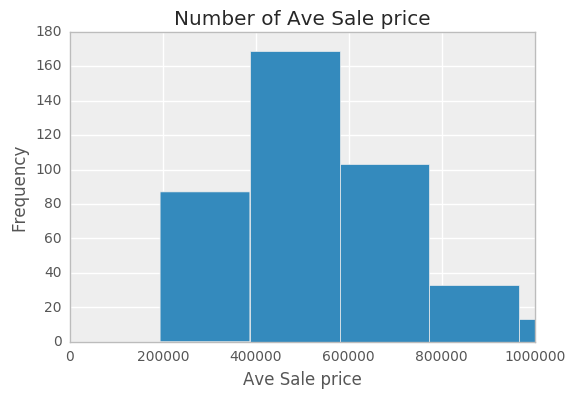

In [12]:
plt.hist(houseprice['average_sale_price'],100)
plt.xlim([0, 1e6])
plt.title('Number of Ave Sale price')
plt.xlabel('Ave Sale price')
plt.ylabel('Frequency')
plt.show()

#### A brief look at the average sale price

### Whitening: Divide 'average_sale_price' by its SDV and save the number in a new column called 'average_sale_pricem', then run the regression

In [13]:
houseprice[['average_sale_price','type_of_home']] = houseprice[['average_sale_price','type_of_home']].apply(pd.to_numeric)
houseprice['average_sale_pricem']= (houseprice['average_sale_price']/houseprice['average_sale_price'].std())

In [14]:
houseprice.head()

,index,Boro,Year,average_sale_price,highest_sale_price,lowest_sale_price,median_sale_price,neighborhood,number_of_sales,total_no_of_properties,type_of_home,average_sale_pricem
0,0,Manhattan,2009,2872500,4750000,995000,2872500,CHELSEA,2,81.0,2,1.689254
1,1,Manhattan,2009,3800000,3800000,3800000,3800000,CHELSEA,1,64.0,3,2.234697
2,2,Manhattan,2009,7926432,7926432,7926432,7926432,EAST VILLAGE,1,22.0,1,4.661361
3,3,Manhattan,2009,3892500,4700000,3085000,3892500,EAST VILLAGE,2,39.0,2,2.289094
4,4,Manhattan,2009,2400000,2400000,2400000,2400000,EAST VILLAGE,1,18.0,3,1.411387


In [15]:
lm = smf.ols(formula='average_sale_pricem ~ type_of_home', data = houseprice).fit()
print lm.summary()

                             OLS Regression Results                            
Dep. Variable:     average_sale_pricem   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.002
Method:                  Least Squares   F-statistic:                   0.06432
Date:                 Thu, 15 Dec 2016   Prob (F-statistic):              0.800
Time:                         23:21:35   Log-Likelihood:                -650.76
No. Observations:                  459   AIC:                             1306.
Df Residuals:                      457   BIC:                             1314.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        0.6002      0.123    

#### The R-squared is 0.004 which is small, so it seems 'average_sale_pricem' has no correlation to 'type_of_home'

### Then have a look at the correlation between 'average_sale_pricem' and 'neighborhood'

In [16]:
a = houseprice.groupby(houseprice['neighborhood'])

In [17]:
meanprice = []
for i in houseprice['neighborhood'].unique():
    meanprice.append(a.get_group(i).average_sale_price.mean())

In [18]:
colum=['meanprice']
priceneig = pd.DataFrame(index=houseprice['neighborhood'].unique(),columns=colum)

In [19]:
priceneig['meanprice'] = meanprice

In [20]:
trace1 = go.Bar(
     x = priceneig.index,
     y = priceneig.meanprice,
    marker=dict(
        color = np.random.randn(500), #set color equal to a variable
        colorscale='Viridis',
        showscale=True
    )
)
data = [trace1]

py.iplot(data, filename='Average Price by Neighborhood')

##### The plot in png

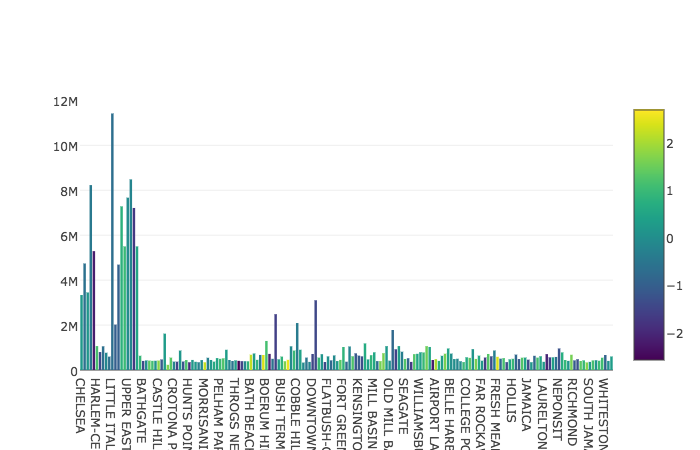

In [1]:
from IPython.display import Image
Image(filename = "newplot.png")

#### The figure shows the house price by neighborhood and from it we can see the highest price is in Manhattan, small Italy 

## Then analyze the house rental 

Year2011/2012, NYC data sets are avalible in following :

Manhattan https://data.cityofnewyork.us/resource/vg9b-tecn.json

Brooklyn https://data.cityofnewyork.us/resource/4wsw-byzq.json

Qeen https://data.cityofnewyork.us/resource/pm5s-v8vm.json

Staten Island https://data.cityofnewyork.us/resource/yu5f-az3h.json

Bronx https://data.cityofnewyork.us/resource/8gur-yq36.json

#### Download data by the same way as above, and selected useful columns :

full_value, address, income, coopids, neighboor, Boro


In [21]:
rentname = pd.DataFrame({'Boro':['Manhattan','Bronx','Brooklyn','Queens','Staten Island '],
           'Fname':['vg9b-tecn', '8gur-yq36', '4wsw-byzq', 'pm5s-v8vm','yu5f-az3h']})
 

In [22]:
houser = pd.DataFrame()

for i in range(len(rentname)):
    getHousePrice(rentname['Fname'][i])
    temp1 = pd.DataFrame()
    temp = pd.read_json(os.getenv("PUIDATA")+'/'+ rentname['Fname'][i] +'.json')
    temp1['full_value'] = temp['comparable_rental_1_full_market_value']
    temp1['address'] = temp['comparable_rental_1_address']
    temp1['income'] = temp['comparable_rental_1_estimated_gross_income']
    temp1['coopdis'] = temp['comparable_rental_1_distance_from_coop_in_miles']
    temp1['neighboor'] = temp['comparable_rental_1_neighborhood']
    temp1['Boro'] = rentname['Boro'][i]
#     temp.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
    houser = houser.append(temp1)

('vg9b-tecn', ' in place, you can continue')
('8gur-yq36', ' in place, you can continue')
('4wsw-byzq', ' in place, you can continue')
('pm5s-v8vm', ' in place, you can continue')
('yu5f-az3h', ' in place, you can continue')


In [23]:
houser= houser.dropna()

In [24]:
houser.head()

,full_value,address,income,coopdis,neighboor,Boro
3,5296000,"{u'type': u'Point', u'coordinates': [-74.00249...",851907,0.00,SOHO,Manhattan
4,32853000,"{u'type': u'Point', u'coordinates': [-73.98195...",7195339,0.21,UPPER WEST SIDE (59-79),Manhattan
5,69083000,"{u'type': u'Point', u'coordinates': [-74.02050...",13502516,0.21,MIDTOWN EAST,Manhattan
6,3581000,"{u'type': u'Point', u'coordinates': [-74.03023...",807498,0.00,UPPER WEST SIDE (79-96),Manhattan
7,1807000,"{u'type': u'Point', u'coordinates': [-74.00784...",350828,0.19,SOHO,Manhattan


In [25]:
houserw = houser.copy()
houserw.head()

,full_value,address,income,coopdis,neighboor,Boro
3,5296000,"{u'type': u'Point', u'coordinates': [-74.00249...",851907,0.00,SOHO,Manhattan
4,32853000,"{u'type': u'Point', u'coordinates': [-73.98195...",7195339,0.21,UPPER WEST SIDE (59-79),Manhattan
5,69083000,"{u'type': u'Point', u'coordinates': [-74.02050...",13502516,0.21,MIDTOWN EAST,Manhattan
6,3581000,"{u'type': u'Point', u'coordinates': [-74.03023...",807498,0.00,UPPER WEST SIDE (79-96),Manhattan
7,1807000,"{u'type': u'Point', u'coordinates': [-74.00784...",350828,0.19,SOHO,Manhattan


In [26]:
houserw['full_value'] = houserw['full_value']/houserw['full_value'].std()
houserw['income'] = houserw['income']/houserw['income'].std()
houserw['coopdis'] = houserw['coopdis']/houserw['coopdis'].std()

In [27]:
houserw.head()

,full_value,address,income,coopdis,neighboor,Boro
3,0.528262,"{u'type': u'Point', u'coordinates': [-74.00249...",0.405642,0.000000,SOHO,Manhattan
4,3.277003,"{u'type': u'Point', u'coordinates': [-73.98195...",3.426117,0.330505,UPPER WEST SIDE (59-79),Manhattan
5,6.890852,"{u'type': u'Point', u'coordinates': [-74.02050...",6.429329,0.330505,MIDTOWN EAST,Manhattan
6,0.357196,"{u'type': u'Point', u'coordinates': [-74.03023...",0.384496,0.000000,UPPER WEST SIDE (79-96),Manhattan
7,0.180244,"{u'type': u'Point', u'coordinates': [-74.00784...",0.167049,0.299029,SOHO,Manhattan


### Run multiple regression

In [28]:
lmrent = smf.ols(formula = ' full_value ~ income + coopdis', data = houserw).fit()
print(lmrent.summary())

                            OLS Regression Results                            
Dep. Variable:             full_value   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 1.889e+04
Date:                Thu, 15 Dec 2016   Prob (F-statistic):               0.00
Time:                        23:21:39   Log-Likelihood:                -187.39
No. Observations:                2725   AIC:                             380.8
Df Residuals:                    2722   BIC:                             398.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0355      0.007     -5.364      0.0

#### The regression shows the income has strong correlation with the house rental. The coef = 0.978

### Plot heat map of house rental

In [30]:
import plotly.plotly as py
import plotly.graph_objs as graph_objs

# mapbox_access_token = 'pk.eyJ1IjoiYWRhbWt1bGlkamlhbiIsImEiOiJjaXNya29kemwwNDNoMnRtMXBobGtvbWE4In0._k_JKvR8MknvKmiUsJ6C7g'

data = graph_objs.Data([
    graph_objs.Scattermapbox(
        lat=['40'],
        lon=['-74'],
        mode='markers',
    )
])
layout = graph_objs.Layout(
    height=600,
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        layers=[
            dict(
#                 sourcetype = 'geojson',
                source = houser['full_value'],
                type = 'fill',
                color = 'rgba(163,22,19,0.8)'
            )
#             dict(
#                 sourcetype = 'geojson',
#                 source = 'https://raw.githubusercontent.com/plotly/datasets/master/florida-blue-data.json',
#                 type = 'fill',
#                 color = 'rgba(40,0,113,0.8)'
#             )
        ],
#         accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=40,
            lon=-74
        ),
        pitch=0,
        zoom=5.2,
        style='light'
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='county-level-choropleths-python')